In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

import string

[nltk_data] Downloading package punkt to C:\Users\Hendelle.DESKTOP-V5J
[nltk_data]     NA20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to C:\Users
[nltk_data]     \Hendelle.DESKTOP-V5JNA20\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Hendelle
[nltk_data]     .DESKTOP-V5JNA20\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Hendelle.DESKTOP-V5J
[nltk_data]     NA20\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Hendelle.DES
[nltk_data]     KTOP-V5JNA20\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [205]:
df = pd.read_excel(r'C:\Users\Hendelle.DESKTOP-V5JNA20\Desktop\PROJECTS\Project PRISM\AllDay\2022\AllDay 2022.xlsx',index_col=False)
df.Comment = df.Comment.astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Branch       864 non-null    object
 1   Review Date  864 non-null    object
 2   Rating       864 non-null    int64 
 3   Comment      266 non-null    string
dtypes: int64(1), object(2), string(1)
memory usage: 27.1+ KB


In [206]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1 to 863
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Branch       266 non-null    object
 1   Review Date  266 non-null    object
 2   Rating       266 non-null    int64 
 3   Comment      266 non-null    string
dtypes: int64(1), object(2), string(1)
memory usage: 10.4+ KB


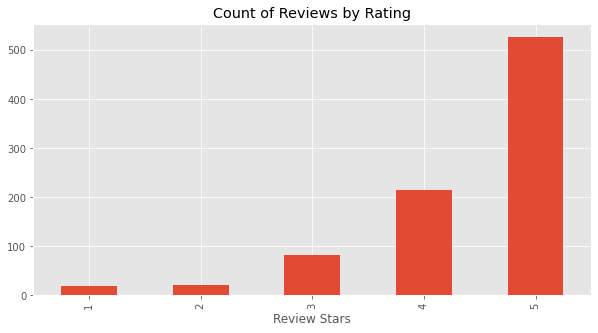

In [207]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Rating',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [208]:
comment = df['Comment'].reset_index(drop=True)
comment1 = df['Comment'][265]
print(comment1)

The overall feel of the place is very nice. They have most of what you need for the house and more. The coffee shop was very pleasant and had a great menu. The 3 stars are because of the overall price. Just too expensive for this area.


In [209]:
tokens = nltk.word_tokenize(comment1)
tokens[:10]

['The', 'overall', 'feel', 'of', 'the', 'place', 'is', 'very', 'nice', '.']

In [210]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('overall', 'JJ'),
 ('feel', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('place', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('nice', 'JJ'),
 ('.', '.')]

In [211]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  overall/JJ
  feel/NN
  of/IN
  the/DT
  place/NN
  is/VBZ
  very/RB
  nice/JJ
  ./.
  They/PRP
  have/VBP
  most/JJS
  of/IN
  what/WP
  you/PRP
  need/VBP
  for/IN
  the/DT
  house/NN
  and/CC
  more/JJR
  ./.
  The/DT
  coffee/NN
  shop/NN
  was/VBD
  very/RB
  pleasant/JJ
  and/CC
  had/VBD
  a/DT
  great/JJ
  menu/NN
  ./.
  The/DT
  3/CD
  stars/NNS
  are/VBP
  because/IN
  of/IN
  the/DT
  overall/JJ
  price/NN
  ./.
  Just/NNP
  too/RB
  expensive/JJ
  for/IN
  this/DT
  area/NN
  ./.)


In [212]:
#VADER SENTIMENT SCORING
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [213]:
df2 = df2.reset_index()
df2 = df2.rename(columns={"index":"New_ID"})
df2['New_ID'] = df2.index + 1
df2

,New_ID,Branch,Review Date,Rating,Comment
0,1,Bacolod,September,5,Very nice furnitures display
1,2,Bacolod,September,5,Relatively expensive
2,3,Bacolod,September,1,Loving the butter from France hope to get more...
3,4,Bacolod,September,1,Their price is misleading..the ones that have ...
4,5,Bacolod,September,5,Store is immaculate. Tip top customer service....
...,...,...,...,...,...
261,262,Tanza,December,4,"Need additional foot traffic, the Mall is stil..."
262,263,Tanza,December,4,Everything is here
263,264,Tierra Nevada,October,5,I love this store. I had challenges looking fo...
264,265,WCC,October,2,They keep playing the ALL TV jingle nonstop ad...


In [214]:
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['Comment']
    myid = row['New_ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/266 [00:00<?, ?it/s]

In [215]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'New_ID'})
vaders = vaders.merge(df2,how='left')
vaders.to_csv('vaders_result.csv' ,index = False)

In [216]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [217]:
text = tokenizer(comment1, return_tensors='pt')
output = model(**text)
scores = output[0][0].detach().numpy()
result = softmax(scores)
result_dict = {
    'Negative' : result[0],
    'Neutral' : result[1],
    'Positive' : result[2]
}
print(scores_dict)

{'roberta_neg': 0.0039922767, 'roberta_neu': 0.018776344, 'roberta_pos': 0.9772315}


In [218]:
print(comment1)
sia.polarity_scores(comment1)

The overall feel of the place is very nice. They have most of what you need for the house and more. The coffee shop was very pleasant and had a great menu. The 3 stars are because of the overall price. Just too expensive for this area.


{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.8953}

In [219]:
def polarity_scores_roberta(df2):
    encoded_text = tokenizer(df2, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Negative' : scores[0],
        'Neutral' : scores[1],
        'Positive' : scores[2]
    }
    return scores_dict

In [220]:
res1 = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['Comment']
    myid = row['New_ID']
    roberta_result = polarity_scores_roberta(text)
    both = {**roberta_result}
    res1[myid] = both
     

  0%|          | 0/266 [00:00<?, ?it/s]

In [221]:
roberta = pd.DataFrame(res1).T
roberta = roberta.reset_index().rename(columns={'index': 'New_ID'})
roberta = roberta.merge(df2,how='left')
roberta.to_csv('roberta_result.csv' ,index = False)

In [222]:
vaders

,New_ID,neg,neu,pos,compound,Branch,Review Date,Rating,Comment
0,1,0.000,0.492,0.508,0.4754,Bacolod,September,5,Very nice furnitures display
1,2,0.000,1.000,0.000,0.0000,Bacolod,September,5,Relatively expensive
2,3,0.000,0.465,0.535,0.9300,Bacolod,September,1,Loving the butter from France hope to get more...
3,4,0.000,0.939,0.061,0.4497,Bacolod,September,1,Their price is misleading..the ones that have ...
4,5,0.092,0.833,0.075,-0.1027,Bacolod,September,5,Store is immaculate. Tip top customer service....
...,...,...,...,...,...,...,...,...,...
261,262,0.000,0.672,0.328,0.5994,Tanza,December,4,"Need additional foot traffic, the Mall is stil..."
262,263,0.000,1.000,0.000,0.0000,Tanza,December,4,Everything is here
263,264,0.000,0.704,0.296,0.7906,Tierra Nevada,October,5,I love this store. I had challenges looking fo...
264,265,0.000,0.833,0.167,0.2023,WCC,October,2,They keep playing the ALL TV jingle nonstop ad...


In [223]:
#roberta = roberta.merge(df,how='right')

In [224]:
#roberta.to_csv('roberta_result.csv' ,index = False)